"This project is a deep learning neural network designed to predict the Moisture ratio with given input parameters such as operational power, initial moisture content, diffusivity, Biot number, and mass transfer coefficient."

The code has been adopted from the video of TensorFlow on regression to find MPL of various cars based on various parameters. And has been modified accordingly to be used in the above mentioned case.

In [0]:
from __future__ import absolute_import, division, print_function

import pathlib
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data = pd.read_csv('datanew.csv')
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0-rc3


In [0]:
data

,TIME,POWER,MOISTURE CONTENT (INITIAL),DIFFUSIVITY,MASS TRANSFER COEFFECIENT,BIOT NUMBER,MOISTURE RATIO
0,0,180,86.05,2.530000e-09,0.001,986.0,1.000000
1,10,180,86.05,2.530000e-09,0.001,986.0,0.996939
2,20,180,86.05,2.530000e-09,0.001,986.0,0.991582
3,30,180,86.05,2.530000e-09,0.001,986.0,0.983546
4,40,180,86.05,2.530000e-09,0.001,986.0,0.972449
...,...,...,...,...,...,...,...
112,360,900,86.05,1.520000e-08,0.014,2300.0,0.051888
113,420,900,86.05,1.520000e-08,0.014,2300.0,0.035456
114,480,900,86.05,1.520000e-08,0.014,2300.0,0.025902
115,540,900,86.05,1.520000e-08,0.014,2300.0,0.021316


In [0]:
#Cleaning data
data.isna().sum()

TIME                          0
POWER                         0
MOISTURE CONTENT (INITIAL)    0
DIFFUSIVITY                   0
MASS TRANSFER COEFFECIENT     0
BIOT NUMBER                   0
MOISTURE RATIO                0
dtype: int64

In [0]:
data.dropna()

,TIME,POWER,MOISTURE CONTENT (INITIAL),DIFFUSIVITY,MASS TRANSFER COEFFECIENT,BIOT NUMBER,MOISTURE RATIO
0,0,180,86.05,2.530000e-09,0.001,986.0,1.000000
1,10,180,86.05,2.530000e-09,0.001,986.0,0.996939
2,20,180,86.05,2.530000e-09,0.001,986.0,0.991582
3,30,180,86.05,2.530000e-09,0.001,986.0,0.983546
4,40,180,86.05,2.530000e-09,0.001,986.0,0.972449
...,...,...,...,...,...,...,...
112,360,900,86.05,1.520000e-08,0.014,2300.0,0.051888
113,420,900,86.05,1.520000e-08,0.014,2300.0,0.035456
114,480,900,86.05,1.520000e-08,0.014,2300.0,0.025902
115,540,900,86.05,1.520000e-08,0.014,2300.0,0.021316


In [0]:
train_data = data.sample(frac = 0.8, random_state=0)
test_data = data.drop(train_data.index)

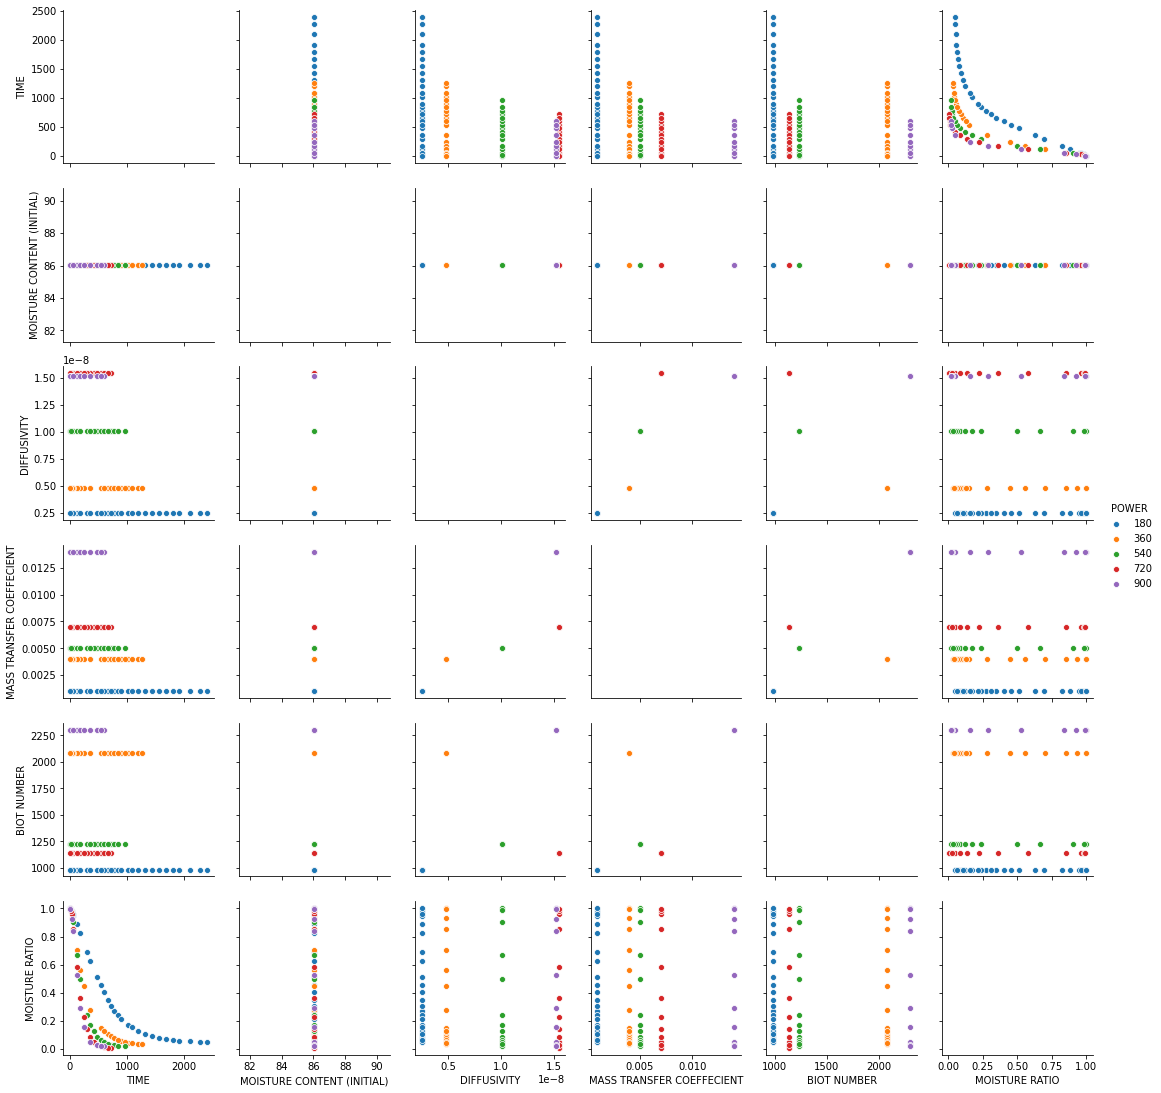

In [0]:
sns.pairplot(train_data[["TIME", "POWER", "MOISTURE CONTENT (INITIAL)", "DIFFUSIVITY", "MASS TRANSFER COEFFECIENT", "BIOT NUMBER", "MOISTURE RATIO"]], diag_kind="kde", hue ="POWER")

In [0]:
train_stats = train_data.describe()
train_stats.pop("MOISTURE RATIO")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TIME,94.0,5.581915e+02,5.493475e+02,0.000000e+00,1.200000e+02,4.800000e+02,7.800000e+02,2.400000e+03
POWER,94.0,4.538298e+02,2.514308e+02,1.800000e+02,1.800000e+02,3.600000e+02,7.200000e+02,9.000000e+02
MOISTURE CONTENT (INITIAL),94.0,8.605000e+01,1.285835e-13,8.605000e+01,8.605000e+01,8.605000e+01,8.605000e+01,8.605000e+01
DIFFUSIVITY,94.0,7.920532e-09,5.284473e-09,2.530000e-09,2.530000e-09,4.810000e-09,1.520000e-08,1.540000e-08
MASS TRANSFER COEFFECIENT,94.0,4.840426e-03,3.968432e-03,1.000000e-03,1.000000e-03,4.000000e-03,7.000000e-03,1.400000e-02
BIOT NUMBER,94.0,1.441234e+03,5.165722e+02,9.860000e+02,9.860000e+02,1.230000e+03,2.080000e+03,2.300000e+03


In [0]:
train_labels = train_data.pop("MOISTURE RATIO")
test_labels = test_data.pop("MOISTURE RATIO")

In [0]:
#Now we are going to normalize the data remaining.
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_data)
normed_test_data = norm(test_data)

#similarly when we pass new values to this model we need to
 #  normalize all the input data we are giving"""

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_data.keys())]),
    layers.Dense(64, activation= tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mse',
                optimizer = optimizer,
                metrics = ['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [0]:

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
print(example_result)

[[ 5.3571776e-02]
 [ 3.4698531e-01]
 [ 1.5132291e-02]
 [-1.1441922e-04]
 [ 3.9644805e-03]
 [-3.7686392e-03]
 [ 3.3007348e-01]
 [-3.2066531e-02]
 [ 1.8684033e-01]
 [ 8.2714176e-03]]


In [0]:
#Training our model
#Display training process by printig one * for each cycle of training
class PrintStar(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('*', end='')
EPOCHS = 3000

history = model.fit(
  normed_train_data, train_labels,
  epochs = EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintStar()])


****************************************************************************************************
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************
******************************************************************************************

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
2995,0.000108,0.006355,0.000121,0.000146,0.008317,0.000146,2995
2996,0.000074,0.006045,0.000089,0.000132,0.007563,0.000132,2996
2997,0.000103,0.006191,0.000111,0.000142,0.007927,0.000142,2997
2998,0.000071,0.005103,0.000087,0.000142,0.007700,0.000142,2998
2999,0.000096,0.005906,0.000097,0.000142,0.009044,0.000142,2999


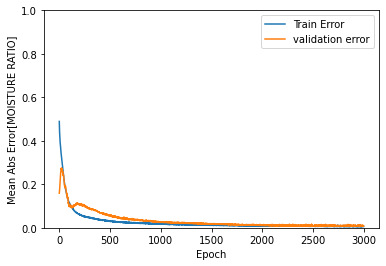

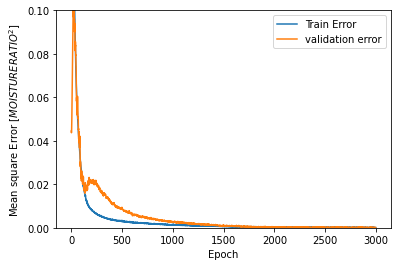

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error[MOISTURE RATIO]')
  plt.plot(hist['epoch'], hist['mae'],
           label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'validation error')
  plt.legend()
  plt.ylim([0,1])

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean square Error [$MOISTURE RATIO ^ 2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'validation error')
  plt.legend()
  plt.ylim([0,0.1])

plot_history(history)

In [0]:
#model = build_model()

#early_stop = keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 10)

##                   validation_split =0.2, verbose=0, callbacks=[early_stop, PrintStar()])

#plot_history(history)

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {} MOISTURE RATIO".format(mae))

Testing set Mean Abs Error: 0.013327399268746376 MOISTURE RATIO


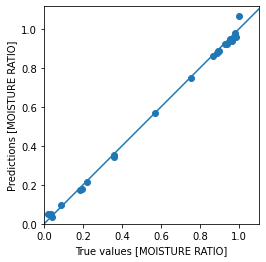

In [0]:
#Finally I am demonstrating the predictions here

test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True values [MOISTURE RATIO]')
plt.ylabel('Predictions [MOISTURE RATIO]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

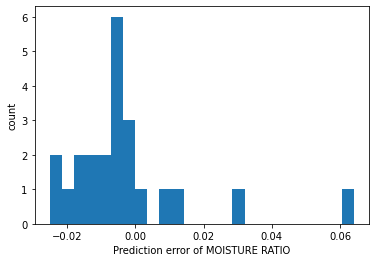

In [0]:

error = test_predictions - test_labels
plt.hist(error, bins =25)
plt.xlabel("Prediction error of MOISTURE RATIO")
_ = plt.ylabel("count")